In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Linear Regression Dataset - data.csv')
df.head(5)

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


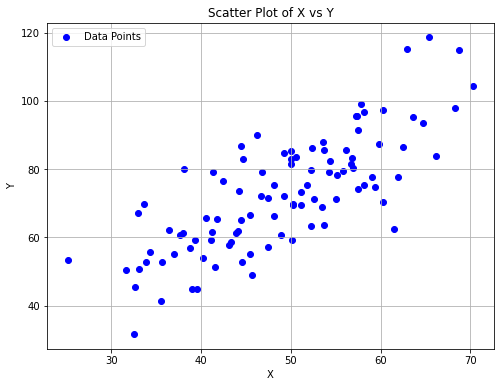

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df['X'], y = df['Y'], color='blue', label='Data Points')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')

plt.legend()

plt.grid(True)
plt.show()

In [14]:
class LR:
    def __init__(self, alpha=0.0001, threshold=0.0001, max_iterations=100):
        self.m = 0
        self.c = 0
        self.alpha = alpha
        self.threshold = threshold
        self.max_iterations = max_iterations
        self.errors = []
        
    def mse(self,y_pred,y_true):
        return np.mean((y_pred-y_true)**2)
    
    def predict(self,x):
        return self.m *x + self.c
    
    def update_params(self,x,y,y_pred):
        n = len(x)
        sum_i = 0
        for i in range(n):
            sum_i += ((y_pred[i]-y[i])*x[i])
        sum_i = sum_i/n
        self.m = self.m - (self.alpha*sum_i)
        self.c = self.c - (self.alpha*sum_i)
    
    def train(self,x,y):
        for _ in range(self.max_iterations):
            y_pred = self.predict(x)
            error = self.mse(y_pred ,y)
            self.errors.append(error)
            
            # difference of last two errors
            if len(self.errors) >1 and abs(self.errors[-1]- self.errors[-2]) < self.threshold:
                print('Convergence at each iteration',len(self.errors))
                break
                
            self.update_params(x,y,y_pred)  
    
    def plot_errors(self):
        plt.plot(range(len(self.errors)), self.errors)
        plt.xlabel('Iterations')
        plt.ylabel('Mean Squared Error')
        plt.title('Mean Squared Error over Iterations')
        plt.show()

Convergence at each iteration 32


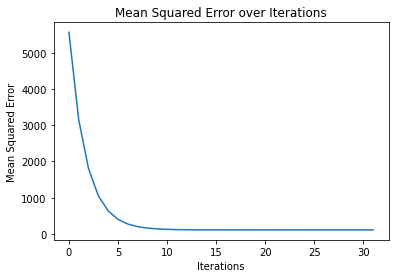

In [15]:
model = LR(alpha=0.0001, threshold=0.0001, max_iterations=1000)
model.train(df['X'], df['Y'])
model.plot_errors()

In [18]:
model.m

1.4508070448806822

In [19]:
model.c

1.4508070448806822

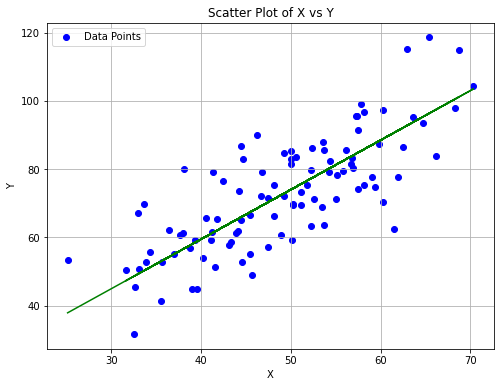

In [21]:
plt.figure(figsize=(8, 6))
y_pred = model.predict(df['X'])
plt.scatter(x=df['X'], y = df['Y'], color='blue', label='Data Points')
plt.plot(df['X'],y_pred,color='g')
# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')

plt.legend()

plt.grid(True)
plt.show()

In [28]:
x = float(input("Enter the value of X to predict : "))

prediction = model.predict(x)
print("Prediction {}: {}".format(x, prediction))


Enter the value of X to predict : 59.81
Prediction 59.81: 88.22357639919429
